# Práctica 1: primera exploración a los datos (hotel_bookings.cvs)

## Alumno: Aguilar Alonso Adriana

In [115]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [116]:
path = 'hotel_bookings.csv'
df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [118]:
df.shape

(119390, 32)

### Tenemos 119390 datos totales y 32 variables o columnas.

In [119]:
df.shape[0]

119390

In [120]:
df.shape[1]

32

In [121]:
df.columns.values.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

### Existen valores faltantes.

In [122]:
df.isnull().any().any()

True

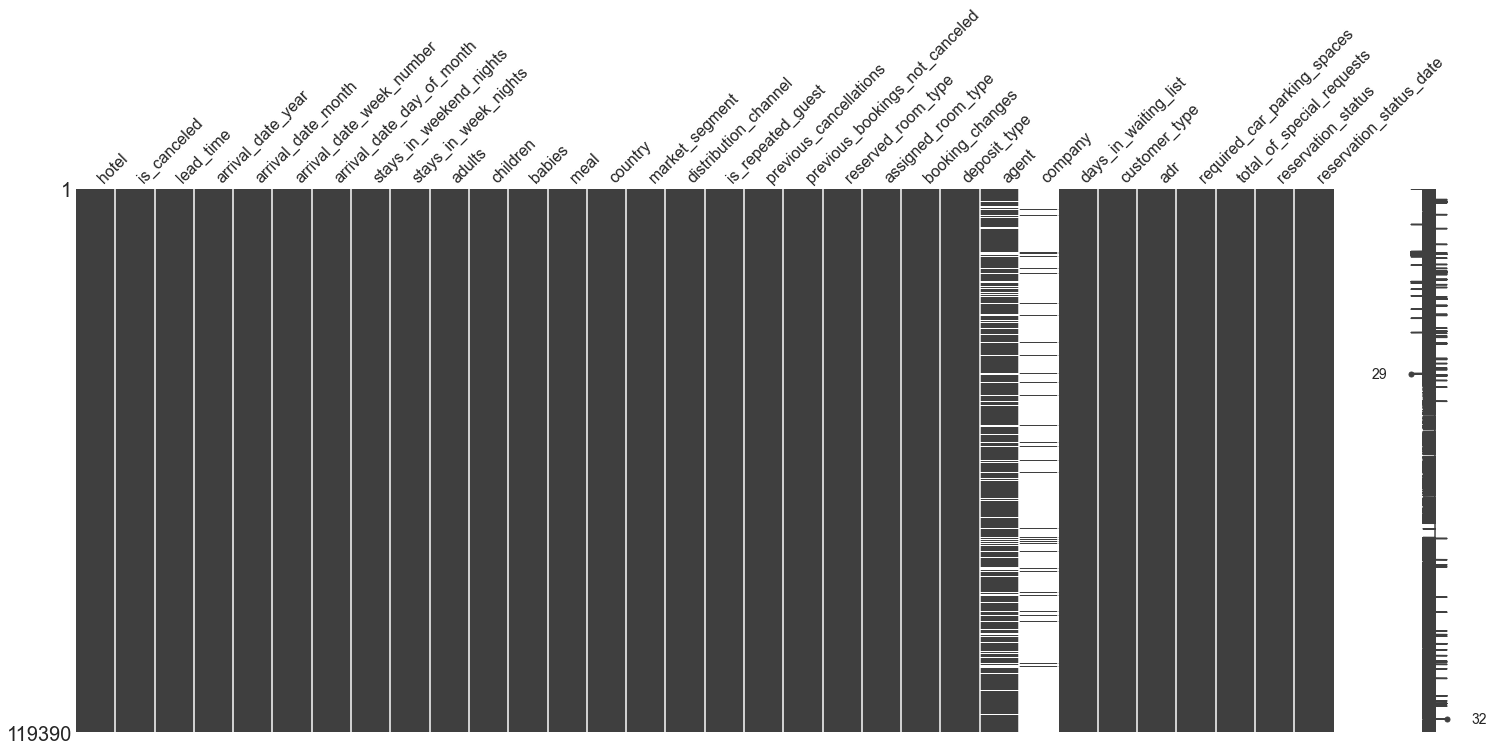

In [123]:
msno.matrix(df)

In [124]:
df.replace({' ': np.nan}, inplace=True)

In [125]:
df.isnull().any().any()

True

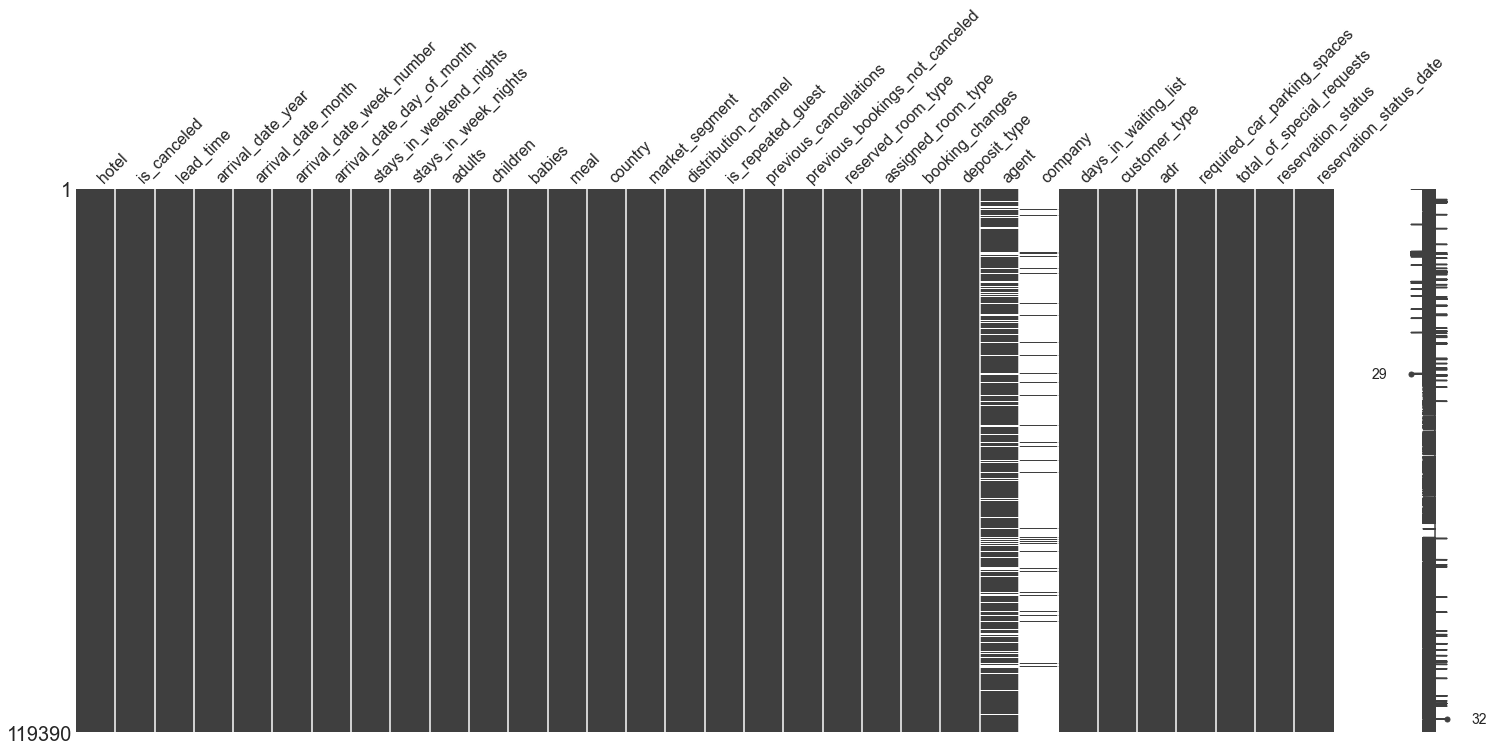

In [126]:
msno.matrix(df)

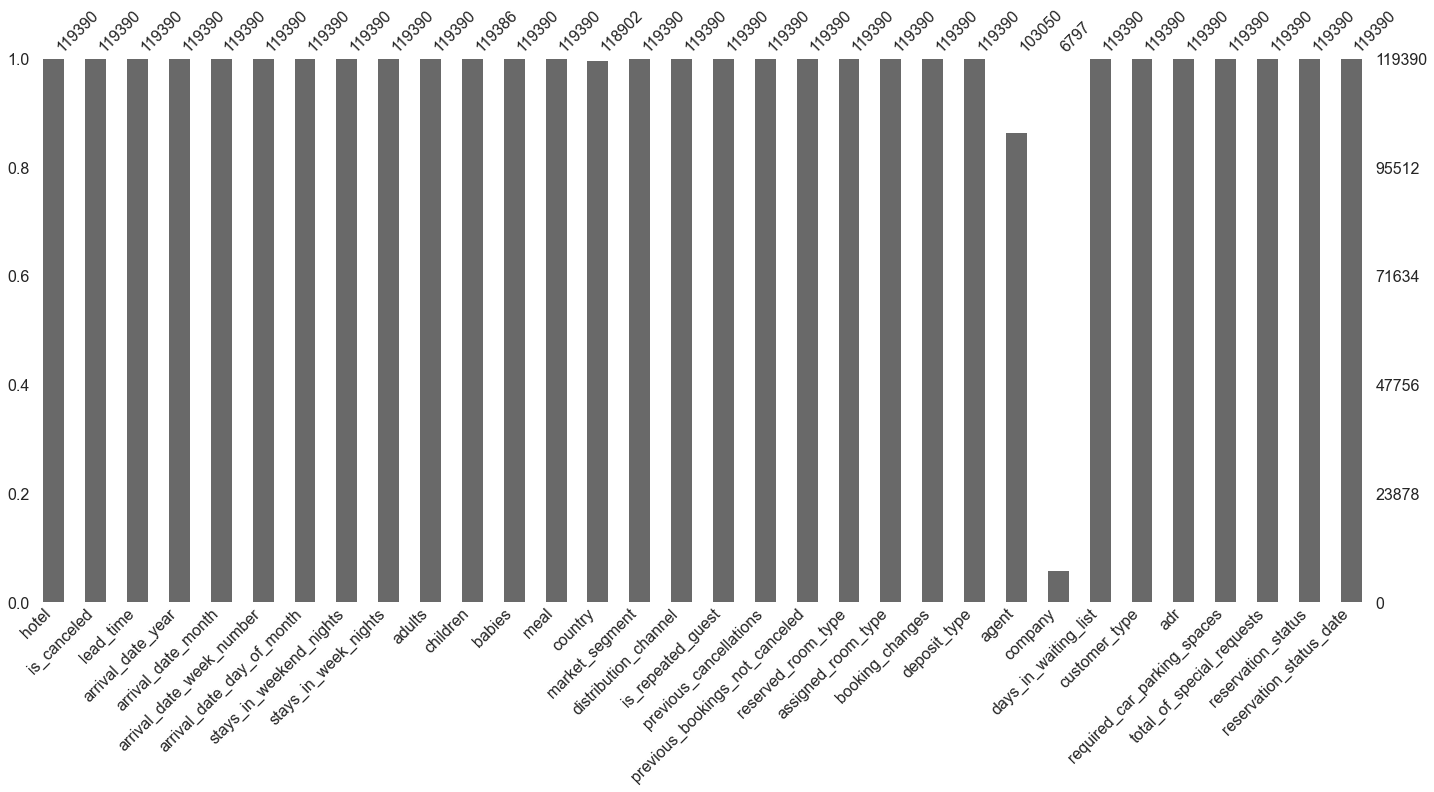

In [127]:
msno.bar(df)

In [128]:
df.columns[df.isnull().any()].tolist()

['children', 'country', 'agent', 'company']

## Número de filas con valores perdidos

### Resumen de estadísticas

In [129]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Seleccionar índice de fila específico

In [130]:
df.loc[[20]]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,No Deposit,241.0,NaN,0,Transient,97.29,0,1,Check-Out,2015-07-06


In [131]:
df.arrival_date_month.loc[[20]]

20    July
Name: arrival_date_month, dtype: object

In [132]:
df["arrival_date_month"].loc[[0]]

0    July
Name: arrival_date_month, dtype: object

In [133]:
df["arrival_date_month"].loc[[5]]

5    July
Name: arrival_date_month, dtype: object

In [134]:
df[["arrival_date_month", "booking_changes"]].loc[[20]]

,arrival_date_month,booking_changes
20,July,0


### Seleccionar índices de fila específicos

In [135]:
df.loc[20:25]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,No Deposit,241.0,NaN,0,Transient,97.29,0,1,Check-Out,2015-07-06
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
23,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,99.67,0,1,Check-Out,2015-07-07
24,Resort Hotel,0,127,2015,July,27,1,2,5,2,...,No Deposit,115.0,NaN,0,Contract,94.95,0,1,Check-Out,2015-07-01
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,...,No Deposit,5.0,NaN,0,Transient,63.60,1,0,Check-Out,2015-07-08


### Excluyendo índices de fila específicos

In [136]:
df.drop([1,4,7], axis=0).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


### Excluyendo índices de fila de rango específicos

In [137]:
df.drop(df.index[2:15], axis=0).head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
15,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.0,0,3,Check-Out,2015-07-05
16,Resort Hotel,0,37,2015,July,27,1,0,4,2,...,No Deposit,8.0,NaN,0,Contract,97.5,0,0,Check-Out,2015-07-05
17,Resort Hotel,0,12,2015,July,27,1,0,1,2,...,No Deposit,240.0,NaN,0,Transient,88.2,0,0,Check-Out,2015-07-02


### Subconjunto basado en desplazamiento desde arriba (abajo)

In [138]:
df[50:].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
50,Resort Hotel,0,113,2015,July,27,2,2,5,2,...,No Deposit,156.0,NaN,0,Transient-Party,67.58,0,2,Check-Out,2015-07-09
51,Resort Hotel,0,93,2015,July,27,2,3,8,2,...,No Deposit,156.0,NaN,0,Contract,56.01,0,0,Check-Out,2015-07-13
52,Resort Hotel,0,76,2015,July,27,2,4,10,2,...,No Deposit,243.0,NaN,0,Contract,110.70,0,0,Check-Out,2015-07-16
53,Resort Hotel,0,3,2015,July,27,2,0,1,2,...,No Deposit,240.0,NaN,0,Transient,88.20,1,0,Check-Out,2015-07-03
54,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,No Deposit,240.0,NaN,0,Transient,147.00,1,0,Check-Out,2015-07-03


In [139]:
df.lead_time.values

array([342, 737,   7, ...,  34, 109, 205], dtype=int64)

In [140]:
df[['is_canceled', "arrival_date_year"]].values

array([[   0, 2015],
       [   0, 2015],
       [   0, 2015],
       ...,
       [   0, 2017],
       [   0, 2017],
       [   0, 2017]], dtype=int64)

In [141]:
df.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

In [142]:
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [143]:
df.arrival_date_year.nunique()

3

In [144]:
df.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

### Obtenga el número de valores únicos para cada columna

In [145]:
df.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


### Un agg dentro de un grupo Andstack al final.

In [146]:
df.groupby('children').agg(['count', 'size', 'nunique']).stack()

hotel  is_canceled  lead_time  arrival_date_year  \
children                                                              
0.0      count    110796       110796     110796             110796   
         size     110796       110796     110796             110796   
         nunique       2            2        477                  3   
1.0      count      4861         4861       4861               4861   
         size       4861         4861       4861               4861   
         nunique       2            2        348                  3   
2.0      count      3652         3652       3652               3652   
         size       3652         3652       3652               3652   
         nunique       2            2        332                  3   
3.0      count        76           76         76                 76   
         size         76           76         76                 76   
         nunique       2            2         56                  3   
10.0     count         1            1          1                  1   
         size          1            1          1                  1   
         nunique       1            1          1                  1   

                  arrival_date_month  arrival_date_week_number  \
children                                                         
0.0      count                110796                    110796   
         size                 110796                    110796   
         nunique                  12                        53   
1.0      count                  4861                      4861   
         size                   4861                      4861   
         nunique                  12                        53   
2.0      count                  3652                      3652   
         size                   3652                      3652   
         nunique                  12                        53   
3.0      count                    76                        76   
         size                     76                        76   
         nunique                  11                        27   
10.0     count                     1                         1   
         size                      1                         1   
         nunique                   1                         1   

                  arrival_date_day_of_month  stays_in_weekend_nights  \
children                                                               
0.0      count                       110796                   110796   
         size                        110796                   110796   
         nunique                         31                       17   
1.0      count                         4861                     4861   
         size                          4861                     4861   
         nunique                         31                        8   
2.0      count                         3652                     3652   
         size                          3652                     3652   
         nunique                         31                        8   
3.0      count                           76                       76   
         size                            76                       76   
         nunique                         28                        4   
10.0     count                            1                        1   
         size                             1                        1   
         nunique                          1                        1   

                  stays_in_week_nights  adults  ...  deposit_type   agent  \
children                                        ...                         
0.0      count                  110796  110796  ...        110796   95149   
         size                   110796  110796  ...        110796  110796   
         nunique                    35      14  ...             3     325   
1.0      count                    4861    4861  ...          4861    4411   
 

In [147]:
df.groupby('children').agg(['count', 'size', 'nunique'])

hotel                 is_canceled                 lead_time  \
           count    size nunique       count    size nunique     count   
children                                                                 
0.0       110796  110796       2      110796  110796       2    110796   
1.0         4861    4861       2        4861    4861       2      4861   
2.0         3652    3652       2        3652    3652       2      3652   
3.0           76      76       2          76      76       2        76   
10.0           1       1       1           1       1       1         1   

                         arrival_date_year  ... required_car_parking_spaces  \
            size nunique             count  ...                     nunique   
children                                    ...                               
0.0       110796     477            110796  ...                           5   
1.0         4861     348              4861  ...                           3   
2.0         3652     332              3652  ...                           3   
3.0           76      56                76  ...                           2   
10.0           1       1                 1  ...                           1   

         total_of_special_requests                 reservation_status          \
                             count    size nunique              count    size   
children                                                                        
0.0                         110796  110796       6             110796  110796   
1.0                           4861    4861       6               4861    4861   
2.0                           3652    3652       6               3652    3652   
3.0                             76      76       4                 76      76   
10.0                             1       1       1                  1       1   

                 reservation_status_date                  
         nunique                   count    size nunique  
children                                                  
0.0            3                  110796  110796     921  
1.0            3                    4861    4861     766  
2.0            3                    3652    3652     766  
3.0            2                      76      76      71  
10.0           1                       1       1       1  

[5 rows x 93 columns]

In [148]:
df_sample = df.sample(frac=0.05, random_state=4)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
47451,City Hotel,1,24,2016,February,9,22,1,2,2,...,No Deposit,86.0,NaN,0,Transient,72.80,0,0,Canceled,2016-02-01
115286,City Hotel,0,170,2017,June,26,30,2,2,3,...,No Deposit,14.0,NaN,0,Transient,145.88,0,0,Check-Out,2017-07-04
33466,Resort Hotel,0,0,2017,February,8,21,0,3,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2017-02-24
106985,City Hotel,0,11,2017,March,9,3,1,2,2,...,No Deposit,14.0,NaN,0,Transient,88.20,1,0,Check-Out,2017-03-06
21410,Resort Hotel,0,3,2016,February,9,27,1,1,1,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2016-02-29


In [149]:
df.shape

(119390, 32)

In [150]:
df_sample.shape

(5970, 32)

## Transformación de datos
### Eliminar filas con conteo faltante

In [151]:
df_dropped = df.dropna(subset=['arrival_date_year'])
df_dropped.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [152]:
df_dropped.shape

(119390, 32)

### Copia de df

In [153]:
df_copy = df.copy()
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [154]:
df_copy.shape

(119390, 32)

In [155]:
df_dropped['children'].dtype

dtype('float64')

In [156]:
df_dropped['children'].mean()

0.10388990333874994

In [157]:
df_copy['children'].fillna(value=np.round(df['children'].mean(),decimals=0), inplace=True)

In [158]:
df_copy.agg(['count', 'size', 'nunique'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,103050,6797,119390,119390,119390,119390,119390,119390,119390
size,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
nunique,2,2,479,3,12,53,31,17,35,14,...,3,333,352,128,4,8879,5,6,3,926


## Manejo de datos categóricos

In [159]:
list(df['required_car_parking_spaces'].unique())

[0, 1, 2, 8, 3]

In [160]:
"""
0 Sin carro
1 Carro pequeño
2 Carro mediano
3 Carro grande
8 Autobus
"""
df['required_car_parking_spaces'].replace({0:"Sin carro", 
                       1:"Carro pequeño",
                       2:"Carro mediano", 
                       3:"Carro grande", 
                       8:"Autobus"}, inplace=True)

In [161]:
list(df['required_car_parking_spaces'].unique())

['Sin carro', 'Carro pequeño', 'Carro mediano', 'Autobus', 'Carro grande']

### Crear un diccionario

In [162]:
keys = list(df['required_car_parking_spaces'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Sin carro': 1,
 'Carro pequeño': 2,
 'Carro mediano': 3,
 'Autobus': 4,
 'Carro grande': 5}

In [163]:
df_copy['required_car_parking_spaces_cat'] = df['required_car_parking_spaces'].map(act)
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,required_car_parking_spaces_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1


In [164]:
list(df_copy['required_car_parking_spaces_cat'].unique())

[1, 2, 3, 4, 5]

## Resumen de datos

### Preparar una representación compacta de datos en bruto a la mano

### Agregación de datos utilizando diferentes métodos estadísticos, matemáticos y de otro tipo. El resumen es útil para la visualización, la compresión de datos en bruto y una mejor comprensión de sus atributos.

In [165]:
df_copy['is_canceled'].mean()

0.37041628277075134

In [166]:
df_copy['is_canceled'][df_copy['required_car_parking_spaces'] == 3]

38117     0
102762    0
110812    0
Name: is_canceled, dtype: int64

In [167]:
df_copy['is_canceled'][df_copy['required_car_parking_spaces'] == 3].mean()

0.0

In [168]:
df_copy.groupby(["is_canceled", "children", "required_car_parking_spaces", "arrival_date_year"]).count()

hotel  \
is_canceled children required_car_parking_spaces arrival_date_year          
0           0.0      0                           2015               11947   
                                                 2016               30359   
                                                 2017               20968   
                     1                           2015                1187   
                                                 2016                3336   
                                                 2017                1878   
                     2                           2015                   4   
                                                 2016                   8   
                                                 2017                  10   
                     3                           2016                   1   
                                                 2017                   2   
                     8                           2017                   2   
            1.0      0                           2015                 318   
                                                 2016                1346   
                                                 2017                1069   
                     1                           2015                  82   
                                                 2016                 282   
                                                 2017                 193   
                     2                           2016                   3   
                                                 2017                   1   
            2.0      0                           2015                 237   
                                                 2016                 783   
                                                 2017                 673   
                     1                           2015                  75   
                                                 2016                 226   
                                                 2017                 115   
                     2                           2017                   2   
            3.0      0                           2015                   4   
                                                 2016                  20   
                                                 2017                  26   
                     1                           2016                   6   
                                                 2017                   3   
1           0.0      0                           2015                7947   
                                                 2016               18874   
                                                 2017               14277   
            1.0      0                           2015                  78   
                                                 2016                 753   
                                                 2017                 736   
            2.0      0                           2015                 115   
                                                 2016                 702   
                                                 2017                 724   
            3.0      0                           2015                   1   
                                                 2016                   8   
                                                 2017                   8   
            10.0     0                           2015                   1   

                                                                    lead_time  \
is_canceled children required_car_parking_spaces arrival_date_year              
0           0.0      0                           2015                   11947   
                                                 2016                   30359   
                                                 2017                   20968   
                     1                     

In [169]:
df_copy.groupby(["is_canceled", "children"])[["required_car_parking_spaces", "arrival_date_year"]].count()

required_car_parking_spaces  arrival_date_year
is_canceled children                                                
0           0.0                             69702              69702
            1.0                              3294               3294
            2.0                              2111               2111
            3.0                                59                 59
1           0.0                             41098              41098
            1.0                              1567               1567
            2.0                              1541               1541
            3.0                                17                 17
            10.0                                1                  1

In [170]:
df_copy.is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [171]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8030,Resort Hotel,1,238,2016,September,37,7,0,3,1,...,Non Refund,1.0,NaN,0,Transient,89.00,Sin carro,0,Canceled,2016-02-09
37532,Resort Hotel,0,33,2017,June,25,19,1,1,2,...,No Deposit,240.0,NaN,0,Transient,154.00,Carro pequeño,1,Check-Out,2017-06-21
76865,City Hotel,1,239,2015,October,42,17,0,1,2,...,Non Refund,1.0,NaN,0,Transient,60.00,Sin carro,0,Canceled,2015-08-17
1960,Resort Hotel,0,64,2015,September,39,24,0,3,2,...,No Deposit,240.0,NaN,0,Transient,80.10,Sin carro,2,Check-Out,2015-09-27
98971,City Hotel,0,34,2016,October,41,2,2,3,2,...,No Deposit,7.0,NaN,0,Transient,95.47,Sin carro,1,Check-Out,2016-10-07


In [172]:
df_sample.groupby(["is_canceled", "children"])[["required_car_parking_spaces", "arrival_date_year"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

arrival_date_year                           
                                   sum         mean count_nonzero
is_canceled children                                             
0           0.0                7068588  2016.140331          3506
            1.0                 322601  2016.256250           160
            2.0                 211713  2016.314286           105
            3.0                   4034  2017.000000             2
1           0.0                4076670  2016.157270          2022
            1.0                 173412  2016.418605            86
            2.0                 177445  2016.420455            88
            3.0                   2016  2016.000000             1

In [173]:
df_sample.groupby(["is_canceled", "children"]).agg({'arrival_date_week_number':np.mean,'arrival_date_day_of_month':np.max})

arrival_date_week_number  arrival_date_day_of_month
is_canceled children                                                     
0           0.0                      26.772961                         31
            1.0                      28.418750                         31
            2.0                      27.009524                         31
            3.0                      32.500000                         15
1           0.0                      27.520772                         31
            1.0                      28.313953                         31
            2.0                      28.068182                         30
            3.0                      31.000000                         28

## Visualización de datos

### Subtramas a mano. El método más básico para crear ejes es usar la función plt.axes

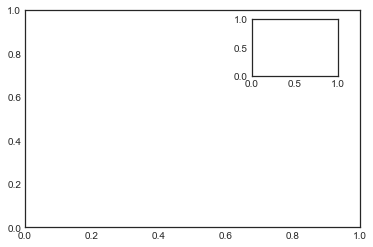

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

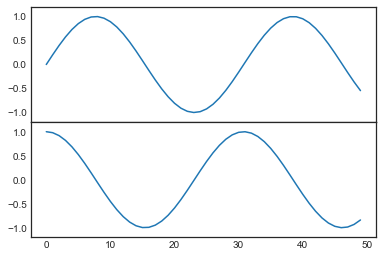

In [175]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

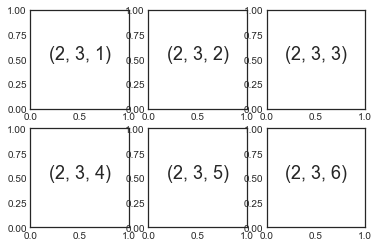

In [176]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

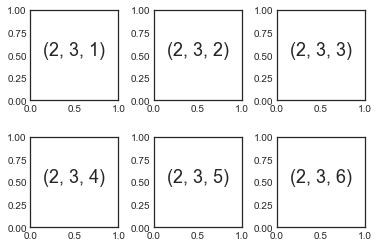

In [177]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

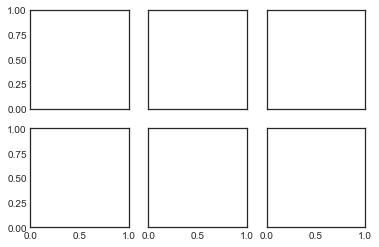

In [178]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

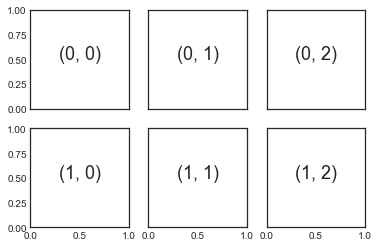

In [179]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

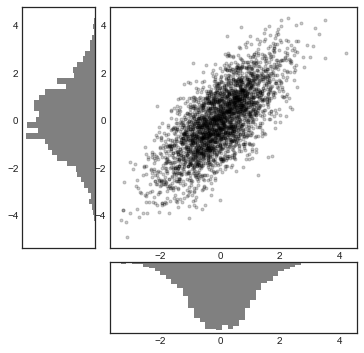

In [180]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Gráfico de dispersión

### Variables capaces de estar altamente correlacionadas. Para confirmar o validar nuestra hipótesis.

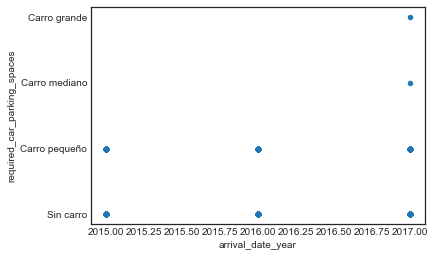

In [181]:
df_sample['arrival_date_year'] = df_sample['arrival_date_year'].astype('int64')

df_sample.plot(kind='scatter',x='arrival_date_year',y='required_car_parking_spaces')

Text(0.5, 1.0, 'Frequency of tipoact')

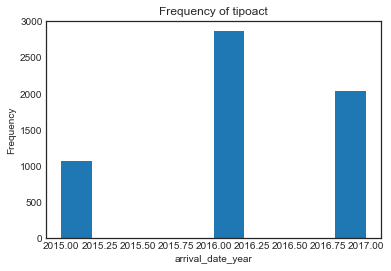

In [182]:
plt.hist(df_sample['arrival_date_year'])
plt.xlabel('arrival_date_year')
plt.ylabel('Frequency')
plt.title('Frequency of tipoact')

Text(0.5, 1.0, 'Frequency of children')

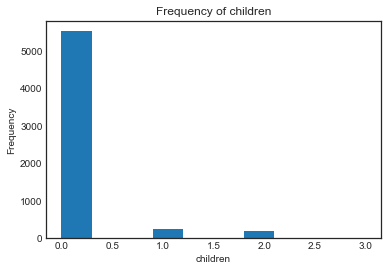

In [183]:
plt.hist(df_sample['children'])
plt.xlabel('children')
plt.ylabel('Frequency')
plt.title('Frequency of children')

## Diagramas de caja
Los diagramas de caja son otra forma de entender la distribución de una variable numérica. Especifica algo llamado cuartiles.

Si los números en una distribución con 100 números están ordenados en orden creciente;
* el primer cuartil ocupará la posición 25
* el tercer cuartil ocupará la posición 75, y así sucesivamente.
* La mediana será el promedio de los términos 50 y 51.
* La mediana es el término medio cuando los números en la distribución se ordenan en orden creciente.
* El modo es el que ocurre con la frecuencia máxima,
* mientras que la media es la suma de todos los números divididos por su recuento total.

Text(0.5, 1.0, 'Box Plot of lead_time count')

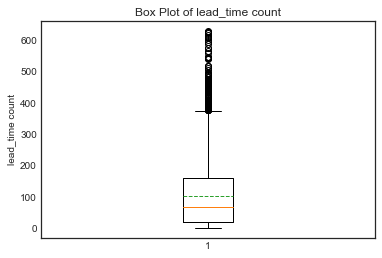

In [184]:
plt.boxplot(df_sample['lead_time'], showmeans=True, meanline=True)
plt.ylabel('lead_time count')
plt.title('Box Plot of lead_time count')